<a href="https://colab.research.google.com/github/Himangi807/DS_Project/blob/main/Final_Project_H%26S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***         Application of Data Science     ***




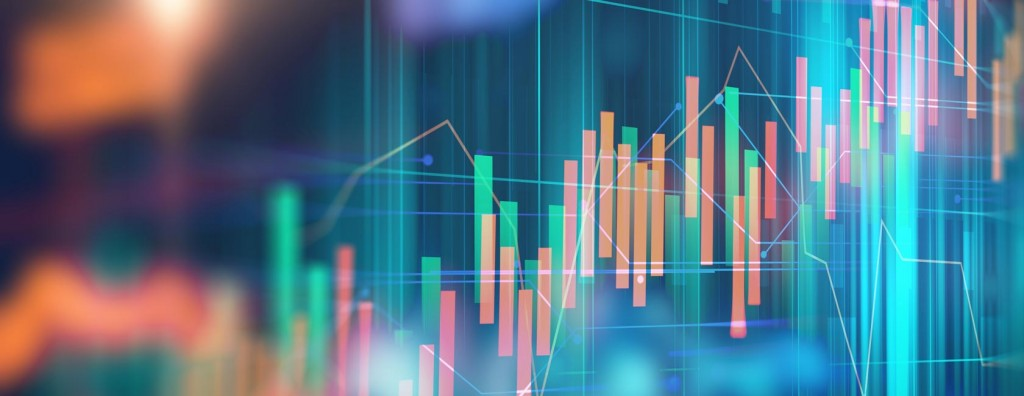

Q: For the NBA Team, find out the top five players, taking in account all the stats of all the games he has ever played. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


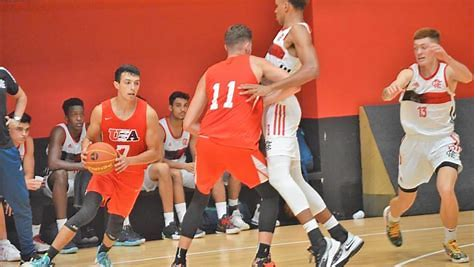

To answer the question, Data Manipulation and Data Visualizaton has been used. 

"A Picture is Worth a Thousand Words".  Our brain and eyes like colour. 

1.  Pictures are more appealing than numbers.
2. Our Brain loves colour
3. Comparison is easy with visuals and it gives better insights
4. More Time=Efficient



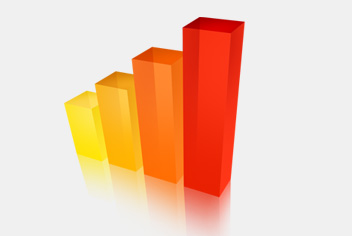

**Steps Involved: **

1.  Collecting Relevant Data
2.  Exploring the data. 
3. Determining Factors that would drive the calculation
4. Deriving the answer through the data. 
5. Plotting a Graph for visual insights and comparison



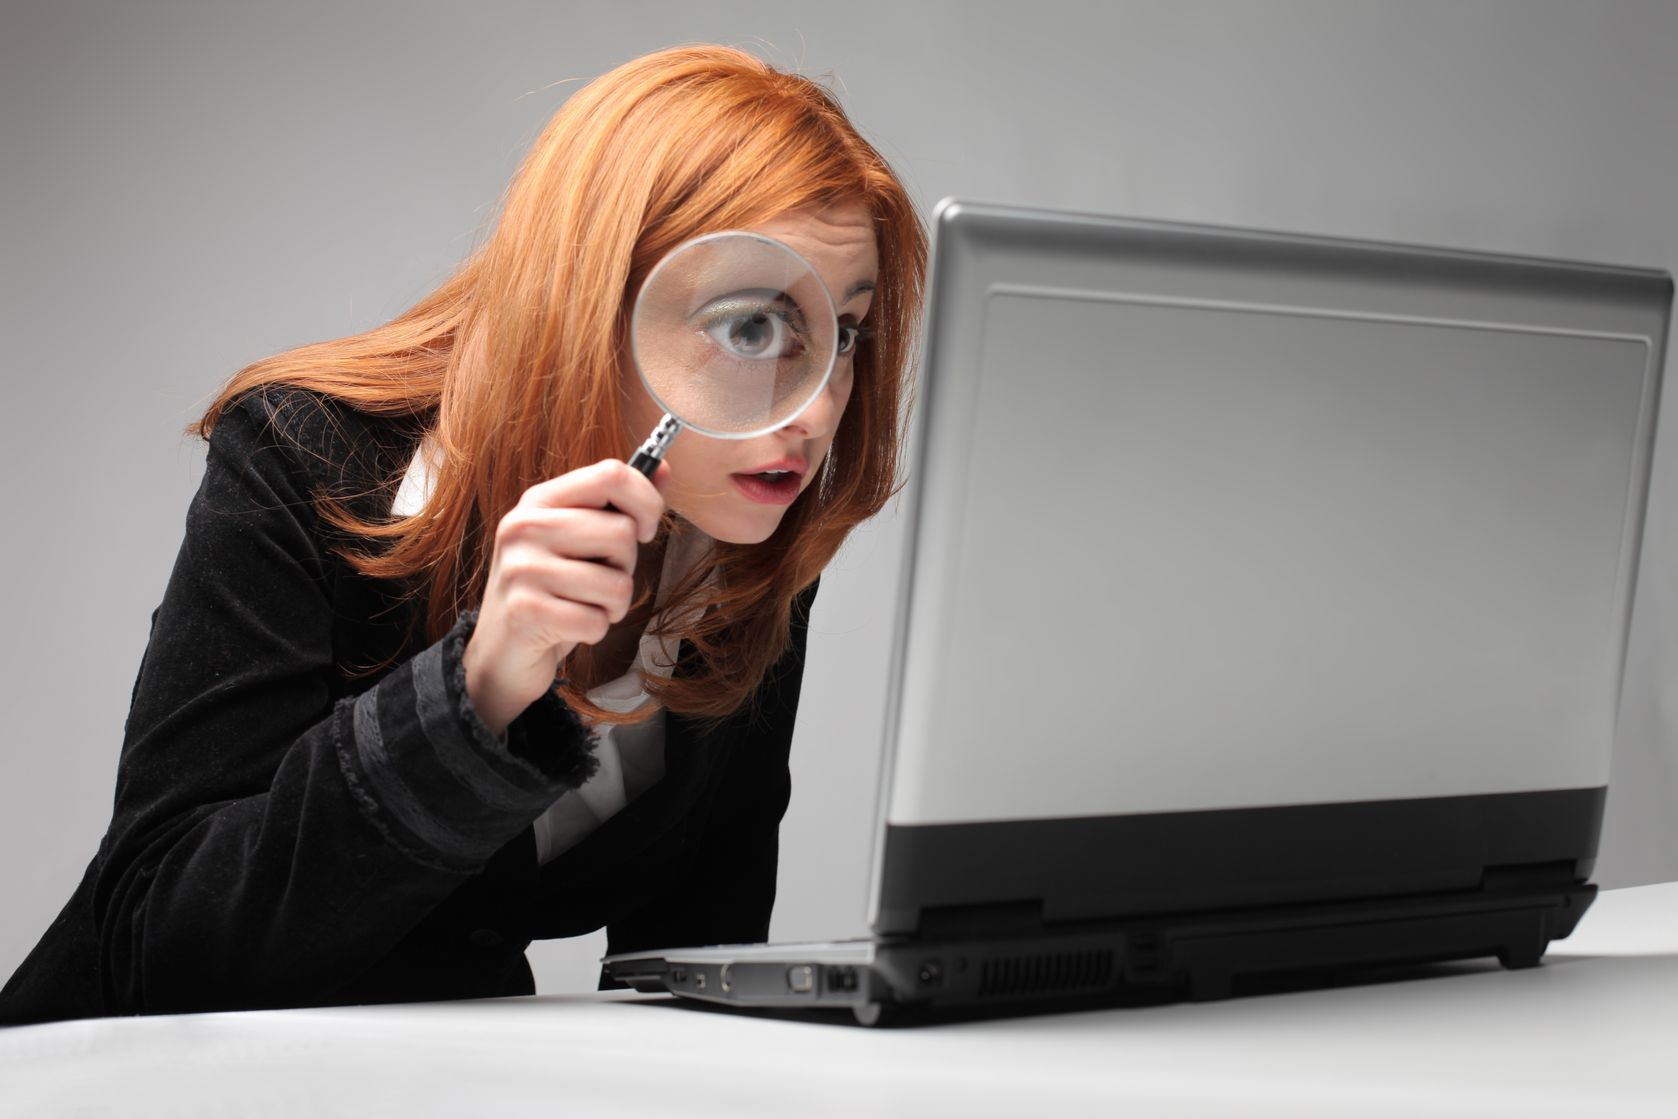



*   Basketball has different categories of points earned in their stats 
*   A formula was designed for the data which took various categories of points and categorized them into atrributes and used the players timestamp to bring out an efficiency.
*   5 Most Efficient Players were Ranked and Bar Chart was used to compare them visually.

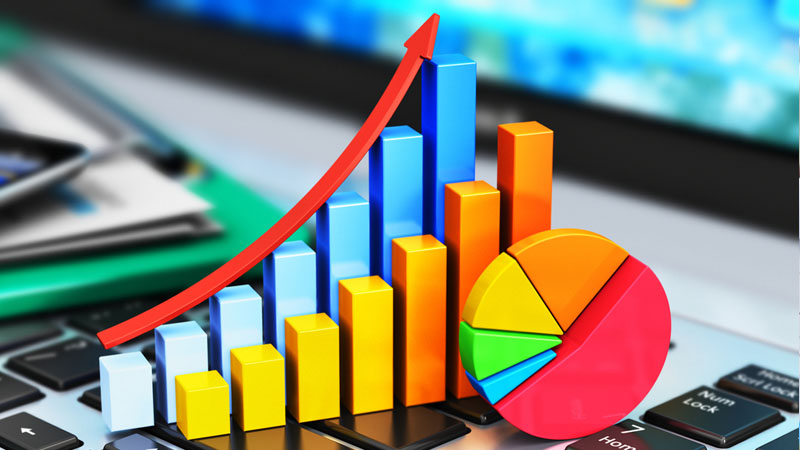

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

**Importing Dataset**

In [3]:
train_set = pd.read_csv('/content/drive/MyDrive/data/bball.csv')

In [4]:
train_set.head()

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1.0,Álex Abrines,SG,25.0,OKC,31.0,2.0,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,0.500,0.487,0.4,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,1,2.0,Quincy Acy,PF,28.0,PHO,10.0,0.0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,0.2,0.3,0.667,0.278,0.7,1.0,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2,3.0,Jaylen Adams,PG,22.0,ATL,34.0,1.0,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,3,4.0,Steven Adams,C,25.0,OKC,80.0,80.0,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,4,5.0,Bam Adebayo,C,21.0,MIA,82.0,28.0,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


**Data Exploration**


In [ ]:
#center, power forward, small forward, point guard, and shooting guard. -- Pos
#g - games played
#gs - game started
#mp- minutes played
#fg- field goal
#fga - field goal attempted
#fg % Field goal percentage
#3p - three-point field goal 
#3pa-3-Point Field Goals Attempted.
#3p% - percentage
#2p -2-Point Field Goal
#2pa - 2-Point Field Goal Attempts.
#2pa%  2-Point Field Goal percetage
#efg% -  Effective Field Goal Percentage
#ft - free throws
#ft% - free throw percentage
#FTA -  free throws attempted
#ORB- Offensive Rebound Percentage 
#DRB -  Defensive Rebounds
#trb - total rebounds
#ast - assists
#STL - steals
#blk - blocks
#tov- turnover
#pf - power forward
#pts - points

**Data Cleaning and Preparation**


In [5]:
train_set.isnull()
train_set.dropna(inplace=True)

In [6]:
train_set.isnull()

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
724,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
725,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False




**Merging All Offensive Efficiency Features Into one List and perform operations on it**

In [7]:
train_set_list = ['FG','2P','3P','FT']
train_set['OffSum'] = train_set[train_set_list].sum(axis=1)
train_set['OffEff']= train_set['OffSum']/train_set['MP']

train_set_list2 = ['STL','BLK']
train_set['DeffSum'] = train_set[train_set_list2].sum(axis=1)
train_set['DeffEff']= train_set['DeffSum']/train_set['MP']
train_set['TotEff'] = train_set['OffEff'] + train_set['DeffEff']
train_set['ScaledEff'] = train_set['TotEff'] * 100
train_set.round({'ScaledEff': 1}) 

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,OffSum,OffEff,DeffSum,DeffEff,TotEff,ScaledEff
0,0,1.0,Álex Abrines,SG,25.0,OKC,31.0,2.0,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,0.500,0.487,0.4,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3,4.0,0.210526,0.7,0.036842,0.247368,24.7
1,1,2.0,Quincy Acy,PF,28.0,PHO,10.0,0.0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,0.2,0.3,0.667,0.278,0.7,1.0,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7,1.5,0.121951,0.5,0.040650,0.162602,16.3
2,2,3.0,Jaylen Adams,PG,22.0,ATL,34.0,1.0,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,2.4,0.190476,0.5,0.039683,0.230159,23.0
3,3,4.0,Steven Adams,C,25.0,OKC,80.0,80.0,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,13.8,0.413174,2.5,0.074850,0.488024,48.8
4,4,5.0,Bam Adebayo,C,21.0,MIA,82.0,28.0,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,8.8,0.377682,1.7,0.072961,0.450644,45.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,722,523.0,Guerschon Yabusele,PF,23.0,BOS,41.0,1.0,6.1,0.9,1.9,0.455,0.2,0.7,0.321,0.6,1.2,0.531,0.513,0.4,0.5,0.682,0.6,0.7,1.3,0.4,0.2,0.2,0.4,0.8,2.3,2.1,0.344262,0.4,0.065574,0.409836,41.0
724,724,525.0,Thaddeus Young,PF,30.0,IND,81.0,81.0,30.7,5.5,10.4,0.527,0.6,1.8,0.349,4.8,8.6,0.564,0.557,1.1,1.7,0.644,2.4,4.1,6.5,2.5,1.5,0.4,1.5,2.4,12.6,12.0,0.390879,1.9,0.061889,0.452769,45.3
725,725,526.0,Trae Young,PG,20.0,ATL,81.0,81.0,30.9,6.5,15.5,0.418,1.9,6.0,0.324,4.6,9.6,0.477,0.480,4.2,5.1,0.829,0.8,2.9,3.7,8.1,0.9,0.2,3.8,1.7,19.1,17.2,0.556634,1.1,0.035599,0.592233,59.2
726,726,527.0,Cody Zeller,C,26.0,CHO,49.0,47.0,25.4,3.9,7.0,0.551,0.1,0.4,0.273,3.8,6.6,0.570,0.559,2.3,2.9,0.787,2.2,4.6,6.8,2.1,0.8,0.8,1.3,3.3,10.1,10.1,0.397638,1.6,0.062992,0.460630,46.1


In [8]:
train_set.dropna(axis=0,how='any',inplace=True)
train_set.sort_values(by = ["ScaledEff"], axis=0 , ascending=False,inplace=True)
train_set["Rank"] = list(range(1,630))
train_set.reset_index(drop=True,inplace=True)  
train_set.head()
train_set1= train_set.head()


**Creating Dataframe for Top 5 Players**

In [9]:
Top5 = train_set1[['Player', 'Tm','Pos','OffEff','DeffEff','TotEff','ScaledEff','Rank']].copy()
Top5.head()



,Player,Tm,Pos,OffEff,DeffEff,TotEff,ScaledEff,Rank
0,James Harden,HOU,PG,0.850543,0.073370,0.923913,92.391304,1
1,Giannis Antetokounmpo,MIL,PF,0.820122,0.085366,0.905488,90.548780,2
2,Anthony Davis,NOP,C,0.760606,0.121212,0.881818,88.181818,3
3,Joel Embiid,PHI,C,0.780415,0.077151,0.857567,85.756677,4
4,Kawhi Leonard,TOR,SF,0.729412,0.064706,0.794118,79.411765,5


In [10]:
List_Rank = Top5['Rank'].to_list()
List_DeffEff= Top5['DeffEff'].to_list()
List_OffEff= Top5['OffEff'].to_list()
List_TotEff= Top5['TotEff'].to_list()
List_ScaledEff=Top5['ScaledEff'].to_list()






**Plotting Offensive Efficiency for All Ranks**

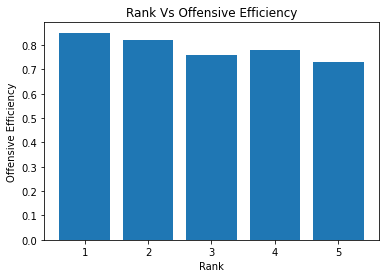

In [11]:
plt.bar(List_Rank, List_OffEff)
plt.title('Rank Vs Offensive Efficiency')
plt.xlabel('Rank')
plt.ylabel('Offensive Efficiency')
plt.show()

Plotting Deffensive Efficiency for All Ranks

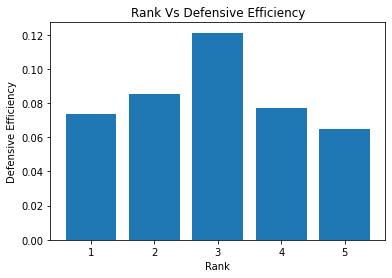

In [12]:
plt.bar(List_Rank, List_DeffEff)
plt.title('Rank Vs Defensive Efficiency')
plt.xlabel('Rank')
plt.ylabel('Defensive Efficiency')
plt.show()

Plotting Total Efficiency

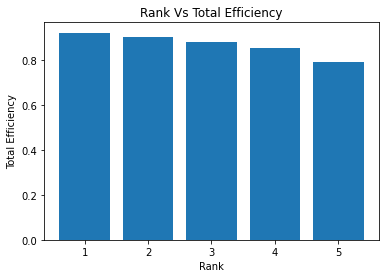

In [13]:
plt.bar(List_Rank, List_TotEff)
plt.title('Rank Vs Total Efficiency')
plt.xlabel('Rank')
plt.ylabel('Total Efficiency')
plt.show()

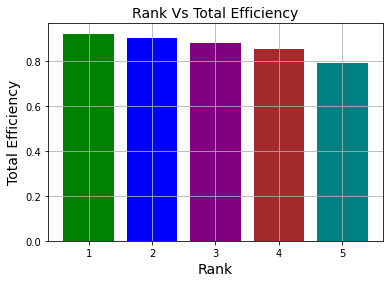

In [14]:

New_Colors = ['green','blue','purple','brown','teal']
plt.bar(List_Rank, List_TotEff,color=New_Colors)
plt.title('Rank Vs Total Efficiency',fontsize=14)
plt.xlabel('Rank',fontsize=14)
plt.ylabel('Total Efficiency',fontsize=14)
plt.grid(True)
plt.show()

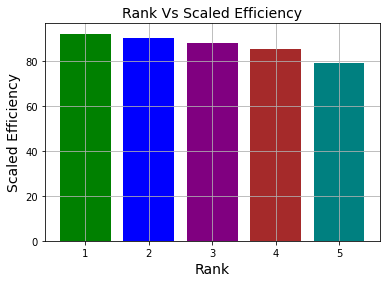

In [15]:
New_Colors = ['green','blue','purple','brown','teal']
plt.bar(List_Rank, List_ScaledEff,color=New_Colors)
plt.title('Rank Vs Scaled Efficiency',fontsize=14)
plt.xlabel('Rank',fontsize=14)
plt.ylabel('Scaled Efficiency',fontsize=14)
plt.grid(True)
plt.show()